# Load the images into numpy matrices

In [1]:
import os
import numpy as np
from numpy import asarray
from skimage.io import imread, imshow

im = []

foldersname = ['\Sample051','\Sample053','\Sample017','\Sample009']
for foldername in foldersname:
        path = "English\Img\GoodImg\Bmp"+foldername
        for filename in os.listdir(path):
            if filename.endswith(".png"):
                image = imread("English\Img\GoodImg\Bmp"+foldername+"\\"+filename)
                data = np.array(image)
                im.append(data)
                continue
            else:
                continue

# Convert images into grayscale

In [2]:
from skimage.color import rgb2gray
grayIm = []
for image in im:
    grayIm.append(rgb2gray(image))


<ipython-input-2-ca7e137bae51>:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayIm.append(rgb2gray(image))


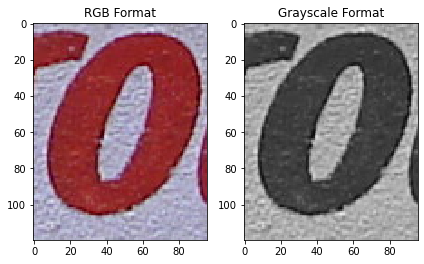

In [3]:
import matplotlib.pyplot as plt

plt.subplot(121), imshow(im[0])
plt.title('RGB Format') 

plt.subplot(122), imshow(grayIm[0])
plt.title('Grayscale Format') 

plt.show()

# Resize images

In [4]:
from skimage.transform import resize
resizeIm = []
for image in grayIm:
    resizeIm.append(resize(image,(64,64)))

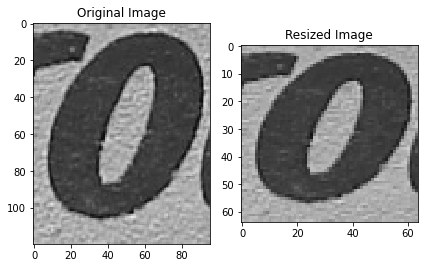

In [5]:
#plot images
plt.subplot(121), imshow(grayIm[0])
plt.title('Original Image')
plt.subplot(122), imshow(resizeIm[0])
plt.title('Resized Image')
plt.show()

In [6]:
# the image is list of lists
# resizeIm array of list of lists 
O = resizeIm[:148]  #148   
q = resizeIm[148:202]   #54
g = resizeIm[202:345]   #143
eight = resizeIm[345:]  #32


# Binary Classifiers

## O and Q classification

In [7]:
X = []
X.extend(O)
X.extend(q)

y = ([0]*148) + ([1]*54)

X = np.array(X)


print(len(X))
print(len(y))

202
202


In [8]:
flattened =[]
for i in range(len(X)):
    flattened.append(X[i].flatten())

- By using the function train_test_split from sklearn library the data splited firstly into Train=80% and Test=20% then split the train into train=60% and validation=20% 
- Stratify is used as a pram in the split function to ensure that the train and test sets have approximately the same percentage of samples of both target classes because the 'q' class has data much less than the 'o' class
- No. of training images = 128  ,  NO. of validation images = 33  , NO. of testing images = 41

In [9]:
from sklearn.model_selection import train_test_split
# 
X_train, X_test, y_train, y_test = train_test_split(flattened, y, test_size=0.2,stratify=y,shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(flattened, y, test_size=0.2,shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(flattened, y, test_size=0.2,shuffle=True,random_state=30)


X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train,shuffle=True)
# X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2,shuffle=True)
# X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2,shuffle=True,random_state=30)



print('No. of training images {0}'.format(len(X_train)))
print('NO. of validation images {0}'.format(len(X_val)))
print('NO. of testing images {0}'.format(len(X_test)))


No. of training images 128
NO. of validation images 33
NO. of testing images 41


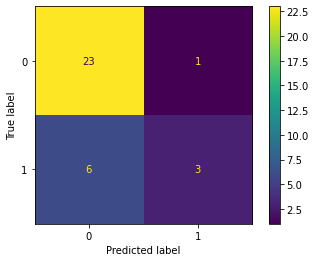

The accuracy = 78.78787878787878
The recall = 33.33333333333333
The precision = 0.75


In [10]:
from sklearn.linear_model import LogisticRegression

#Train the model
LR = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear')
LR.fit(X_train, y_train)

#Predict the validation data 
y_pred = LR.predict(X_val)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

#Plot the confusion matrix and get the confusion matrix matrics
cm = confusion_matrix(y_val, y_pred, labels=LR.classes_)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=LR.classes_)
disp.plot()

plt.show()

accuracy = (tp+ tn)/(tp + fp + tn+ fn)
print('The accuracy = {0}'.format(accuracy*100))

recall = (tp)/(tp+fn)
print('The recall = {0}'.format(recall*100))

precision = (tp)/(tp+fp)
print('The precision = {0}'.format(precision))



- Firstly I training the model on training set and get the accuracy by validation and get accuarcy = 71% so i change the hyper-prameter value max_iter from 100 iteration into 10 iteration after that the accuracy increased became 78.79%.This low accuracy is beacuse the imbalance in the data. 
- The TP = 23 which mean that the model predicted 0/'O' class true 23 times 
- The FP = 1 which mean that the model predicted 0/'O' class 1 time wronge
- The FN = 6 which mean that the model predicted 1/'q' class 6 times wronge
- The TN = 3 which mean that the model predicted 1/'q' class true 3 times
- The precision = 0.75 which mean that the model predicts the image is 0/'O' correct 75%
- The recall = 33.33 which mean that the model correctly identifies 33% of all 0s/'O's

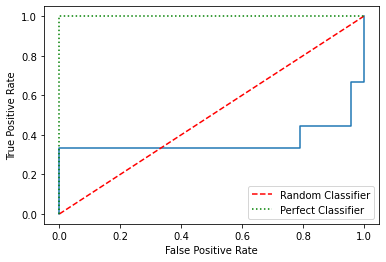

The auc =  0.3657407407407407


In [11]:
from sklearn import metrics

#define metrics
y_pred_proba = LR.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

roc_auc = metrics.auc(fpr, tpr)
print('The auc = ',roc_auc)

We could see that the classifier is not so good or the performance is bad because the curve is very far from the top-left corner which indicate a better performance. And we could make sure that the classification is bad from the auc that is 0.4

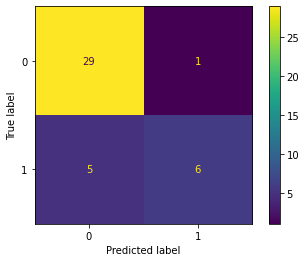

The accuracy = 85.36585365853658
The recall = 54.54545454545454
The precision = 0.8571428571428571


In [12]:
from sklearn.linear_model import LogisticRegression

X_train_ = X_train+X_val
y_train_ = y_train+y_val

LR_ = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear')
LR_.fit(X_train_, y_train_)

y_pred_ = LR_.predict(X_test)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_ = confusion_matrix(y_test, y_pred_, labels=LR_.classes_)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_).ravel()
disp_ = ConfusionMatrixDisplay(confusion_matrix=cm_,
                               display_labels=LR_.classes_)
disp_.plot()

plt.show()

accuracy_ = (tp + tn)/(tp+fp + tn+ fn)
print('The accuracy = {0}'.format(accuracy_*100))

recall_ = (tp)/(tp+fn)
print('The recall = {0}'.format(recall_*100))

precision_ = (tp)/(tp+fp)
print('The precision = {0}'.format(precision_))


- Secondly I training the model on training set + validation and get the accuracy 85.36%. 
- The TP = 29 which mean that the model predicted 0/'O' class true 29 times 
- The FP = 1 which mean that the model predicted 0/'O' class 1 time wronge
- The FN = 5 which mean that the model predicted 1/'q' class 5 times wronge
- The TN = 6 which mean that the model predicted 1/'q' class true 6 times
- The precision = 0.85 which mean that the model predicts the image is 0/'O' correct 85%
- The recall = 54.54 which mean that the model correctly identifies 54% of all 0s/'O's

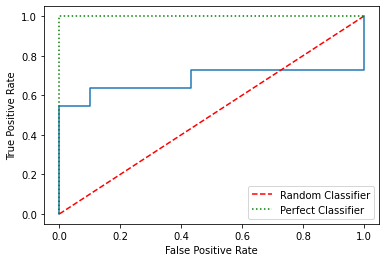

The auc =  0.6787878787878788


In [13]:
#define metrics
y_pred_proba_ = LR_.predict_proba(X_test)[::,1]
fpr_, tpr_, _ = metrics.roc_curve(y_test, y_pred_proba_)

#create ROC curve
plt.plot(fpr_,tpr_)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()
roc_auc = metrics.auc(fpr_, tpr_)
print('The auc = ',roc_auc)

We could see that the classifier is more better this time may be because the data increased. We know the classifier is more better because the curve move more twored the top-left corner and the auc = 0.6

## G and 8 classification

In [20]:
X = []
X.extend(g)
X.extend(eight)

y = ([0]*143) + ([1]*32)

X = np.array(X)


print(len(X))
print(len(y))

175
175


In [21]:
flattened =[]
for i in range(len(X)):
    flattened.append(X[i].flatten())

- By using the function train_test_split from sklearn library the data splited firstly into Train=80% and Test=20% then split the train into train=60% and validation=20% 
- Stratify is used as a pram in the split function to ensure that the train and test sets have approximately the same percentage of samples of both target classes because the '8' class has data much less than the 'g' class
- No. of training images = 112  ,  NO. of validation images = 28  , NO. of testing images = 35

In [22]:
from sklearn.model_selection import train_test_split
# 
X_train, X_test, y_train, y_test = train_test_split(flattened, y, test_size=0.2,stratify=y,shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(flattened, y, test_size=0.2,shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(flattened, y, test_size=0.2,shuffle=True,random_state=30)


X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train,shuffle=True)
# X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2,shuffle=True)
# X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2,shuffle=True,random_state=30)



print('No. of training images {0}'.format(len(X_train)))
print('NO. of validation images {0}'.format(len(X_val)))
print('NO. of testing images {0}'.format(len(X_test)))


No. of training images 112
NO. of validation images 28
NO. of testing images 35


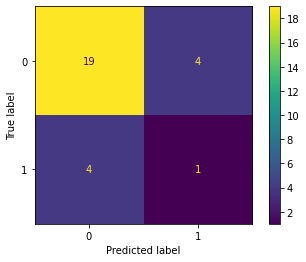

The accuracy = 71.42857142857143
The recall = 20.0
The precision = 0.2


In [23]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear',random_state=0)
LR.fit(X_train, y_train)

# from sklearn.metrics import accuracy_score

y_pred = LR.predict(X_val)
# print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_val, y_pred)))

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred, labels=LR.classes_)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=LR.classes_)
disp.plot()

plt.show()

accuracy = (tp+ tn)/(tp + fp + tn+ fn)
print('The accuracy = {0}'.format(accuracy*100))

recall = (tp)/(tp+fn)
print('The recall = {0}'.format(recall*100))

precision = (tp)/(tp+fp)
print('The precision = {0}'.format(precision))



- Firstly I training the model on training set and get the accuracy by validation and get accuarcy = 71.43%.This low accuracy is beacuse the imbalance in the data. 
- The TP = 19 which mean that the model predicted 0/'g' class true 19 times 
- The FP = 4 which mean that the model predicted 0/'g' class 4 time wronge
- The FN = 4 which mean that the model predicted 1/'8' class 4 times wronge
- The TN = 1 which mean that the model predicted 1/'8' class true 1 times
- The precision = 0.2 which mean that the model predicts the image is 0/'g' correct 20%
- The recall = 33.33 which mean that the model correctly identifies 20% of all 0s/'g's

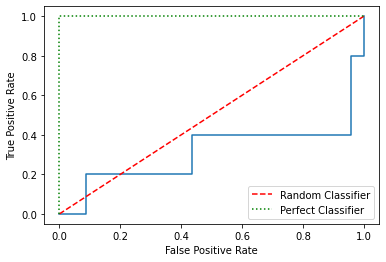

The auc =  0.3130434782608696


In [24]:
from sklearn import metrics

#define metrics
y_pred_proba = LR.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

roc_auc = metrics.auc(fpr, tpr)
print('The auc = ',roc_auc)

We could see that the classifier is not so good or the performance is bad because the curve is very far from the top-left corner which indicate a better performance. And we could make sure that the classification is bad from the auc that is 0.3

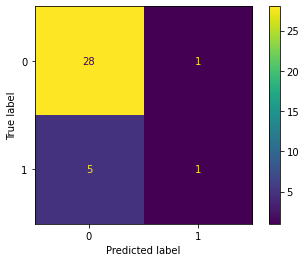

The accuracy = 82.85714285714286
The recall = 16.666666666666664
The precision = 0.5


In [25]:
from sklearn.linear_model import LogisticRegression

X_train_ = X_train+X_val
y_train_ = y_train+y_val

LR_ = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear',random_state=0)
LR_.fit(X_train_, y_train_)

y_pred_ = LR_.predict(X_test)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_ = confusion_matrix(y_test, y_pred_, labels=LR_.classes_)
tn, fp, fn, tp = cm_.ravel()
disp_ = ConfusionMatrixDisplay(confusion_matrix=cm_,
                               display_labels=LR_.classes_)
disp_.plot()

plt.show()

accuracy_ = (tp + tn)/(tp+fp + tn+ fn)
print('The accuracy = {0}'.format(accuracy_*100))

recall_ = (tp)/(tp+fn)
print('The recall = {0}'.format(recall_*100))

precision_ = (tp)/(tp+fp)
print('The precision = {0}'.format(precision_))


- Secondly I training the model on training set + validation and get the accuracy 82.86%. 
- The TP = 28 which mean that the model predicted 0/'g' class true 28 times 
- The FP = 1 which mean that the model predicted 0/'g' class 1 time wronge
- The FN = 5 which mean that the model predicted 1/'8' class 5 times wronge
- The TN = 1 which mean that the model predicted 1/'8' class true 1 times
- The precision = 0.5 which mean that the model predicts the image is 0/'g' correct 50%
- The recall = 16.67 which mean that the model correctly identifies 16.67% of all 0s/'O's

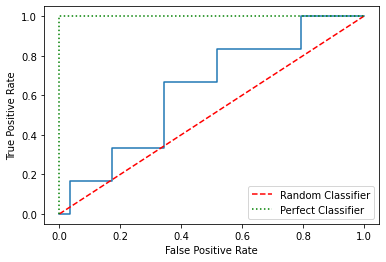

The auc 0.632183908045977


In [26]:
#define metrics
y_pred_proba_ = LR_.predict_proba(X_test)[::,1]
fpr_, tpr_, _ = metrics.roc_curve(y_test, y_pred_proba_)

#create ROC curve
plt.plot(fpr_,tpr_)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()
roc_auc = metrics.auc(fpr_, tpr_)
print('The auc',roc_auc)

We could see that the classifier is more better this time may be because the data increased. We know the classifier is more better because the curve move more twored the top-left corner and the auc = 0.6

# Multiclassifier

In [27]:
X = []
X.extend(O)
X.extend(q)
X.extend(g)
X.extend(eight)

X = np.array(X)
y = ([0]*148) + ([1]*54) + ([2]*143) + ([3]*32)


In [28]:
flattened =[]
for i in range(len(X)):
    flattened.append(X[i].flatten())

- By using the function train_test_split from sklearn library the data splited firstly into Train=80% and Test=20% then split the train into train=60% and validation=20% 
- Stratify is used as a pram in the split function to ensure that the train and test sets have approximately the same percentage of samples of the target classes
- No. of training images = 240 ,  NO. of validation images = 61  , NO. of testing images = 76

In [29]:
from sklearn.model_selection import train_test_split
# 
X_train, X_test, y_train, y_test = train_test_split(flattened, y, test_size=0.2,stratify=y,shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(flattened, y, test_size=0.2,shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(flattened, y, test_size=0.2,shuffle=True,random_state=30)


X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train,shuffle=True)
# X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2,shuffle=True)
# X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2,shuffle=True,random_state=30)



print('No. of training images {0}'.format(len(X_train)))
print('NO. of validation images {0}'.format(len(X_val)))
print('NO. of testing images {0}'.format(len(X_test)))


No. of training images 240
NO. of validation images 61
NO. of testing images 76


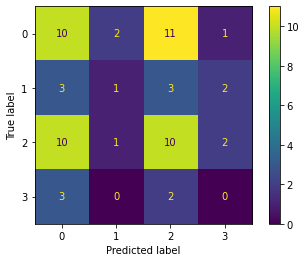

The accuracy = 34.42622950819672
The recall = 24.06400966183575
The precision = 25.48076923076923
The F1 score =  0.24752132945809113


In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=100, tol=0.1, solver='liblinear',random_state=0)
LR.fit(X_train, y_train)


y_pred = LR.predict(X_val)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred, labels=LR.classes_)

tp0, fp0_1, fp0_2,fp0_3,fp1_0,tp1,fp1_2,fp1_3,fp2_0,fp2_1,tp2,fp2_3,fp3_0,fp3_1,fp3_2,tp3=cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=LR.classes_)
disp.plot()

plt.show()

accuracy = (tp0+tp1+tp2+tp3)/(fp0_1+fp0_2+fp0_3+fp1_0+fp1_2+fp1_3+fp2_0+fp2_1+fp2_3+fp3_0+fp3_1+fp3_2+tp0+tp1+tp2+tp3)
print('The accuracy = {0}'.format(accuracy*100))

recall0 = (tp0)/(tp0+fp0_1+fp0_2+fp0_3)
recall1 = (tp1)/(fp1_0+tp1+fp1_2+fp1_3)
recall2 = (tp2)/(fp2_0+fp2_1+tp2+fp2_3)
recall3 = (tp3)/(fp3_0+fp3_1+fp3_2+tp3)

Recall = (recall0+recall1+recall2+recall3)/4
print('The recall = {0}'.format((Recall)*100))


precision0  = (tp0)/(tp0+fp1_0+fp2_0+fp3_0)
precision1  = (tp1)/(tp1+fp0_1+fp2_1+fp3_1)
precision2  = (tp2)/(tp2+fp0_2+fp1_2+fp3_2)
precision3  = (tp3)/(tp3+fp0_3+fp1_3+fp2_3)

Precision = (precision0+precision1+precision2+precision3)/4
print('The precision = {0}'.format((Precision)*100))

F1Score = 2*(Recall * Precision) / (Recall + Precision)

print('The F1 score = ',F1Score)


- Firstly I training the model on training set and get the accuracy by validation and get accuarcy = 34.43%.This low accuracy is beacuse the imbalance in the data. 
- The model predict 10 times correctly the class 0/'O' and 14 times uncorrect
- The model predict 1 times correctly the class 1/'q' and 8 times uncorrect
- The model predict 10 times correctly the class 2/'g' and 13 times uncorrect
- The model predict 0 times correctly the class 3/'8' and 5 times uncorrect
- The precision = 25.48 which mean that the model predicts the images in average correct 25%
- The recall = 24.06 which mean that the model correctly identifies 24% of all images
- The f1 score mean of an individual’s performance, based on two factors the precision and recall. the f1 score = 0.2 which mean the model or the classifier is bad.

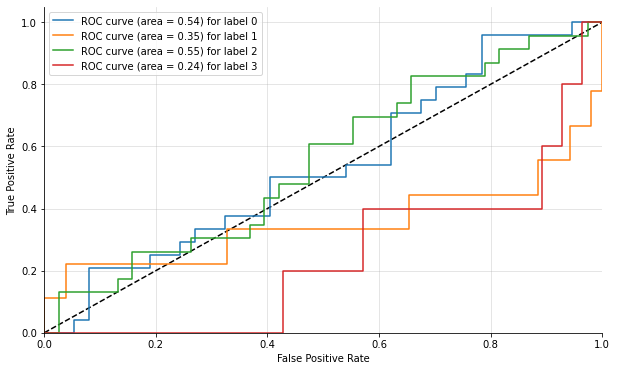

In [31]:
import pandas as pd
import seaborn as sns
from sklearn import metrics 

y_pred_proba = LR.predict_proba(X_val)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

y_val_dummies = pd.get_dummies(y_val, drop_first=False).values   #to make it binary because roc work with binary not mutli

for i in range(4):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_val_dummies[:, i], y_pred_proba[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
for i in range(4):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()



We could see that the 4 classifiers is not so good or the performance is bad because the curve is very far from the top-left corner which indicate a better performance. And we could make sure that the classification is bad from the auc of each classifier. The better class is class 2/'g' with auc = 0.55.

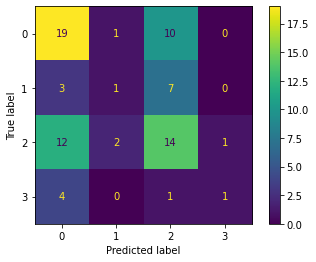

The accuracy = 46.05263157894737
The recall = 34.341692789968654
The precision = 42.1875
The F1 score =  0.3786241855583006


In [32]:
from sklearn.linear_model import LogisticRegression

X_train_ = X_train+X_val
y_train_ = y_train+y_val

LR = LogisticRegression(max_iter=100, tol=0.1, solver='liblinear',random_state=0)
LR.fit(X_train_, y_train_)


y_pred_ = LR.predict(X_test)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_ = confusion_matrix(y_test, y_pred_, labels=LR.classes_)

tp0, fp0_1, fp0_2,fp0_3,fp1_0,tp1,fp1_2,fp1_3,fp2_0,fp2_1,tp2,fp2_3,fp3_0,fp3_1,fp3_2,tp3=cm_.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_,
                               display_labels=LR.classes_)
disp.plot()

plt.show()

accuracy_ = (tp0+tp1+tp2+tp3)/(fp0_1+fp0_2+fp0_3+fp1_0+fp1_2+fp1_3+fp2_0+fp2_1+fp2_3+fp3_0+fp3_1+fp3_2+tp0+tp1+tp2+tp3)
print('The accuracy = {0}'.format(accuracy_*100))

recall0_ = (tp0)/(tp0+fp0_1+fp0_2+fp0_3)
recall1_ = (tp1)/(fp1_0+tp1+fp1_2+fp1_3)
recall2_ = (tp2)/(fp2_0+fp2_1+tp2+fp2_3)
recall3_ = (tp3)/(fp3_0+fp3_1+fp3_2+tp3)

Recall_ = (recall0_+recall1_+recall2_+recall3_)/4
print('The recall = {0}'.format((Recall_)*100))


precision0_  = (tp0)/(tp0+fp1_0+fp2_0+fp3_0)
precision1_  = (tp1)/(tp1+fp0_1+fp2_1+fp3_1)
precision2_  = (tp2)/(tp2+fp0_2+fp1_2+fp3_2)
precision3_  = (tp3)/(tp3+fp0_3+fp1_3+fp2_3)

Precision_ = (precision0_+precision1_+precision2_+precision3_)/4
print('The precision = {0}'.format((Precision_)*100))

F1Score_ = 2*(Recall_ * Precision_) / (Recall_ + Precision_)

print('The F1 score = ',F1Score_)


- Secondly I training the model on training set + validation and get the accuracy 46.05%. 
- The model predict 19 times correctly the class 0/'O' and 11 times uncorrect
- The model predict 1 times correctly the class 1/'q' and 10 times uncorrect
- The model predict 14 times correctly the class 2/'g' and 15 times uncorrect
- The model predict 1 times correctly the class 3/'8' and 5 times uncorrect
- The precision = 42.19 which mean that the model predicts the images in average correct 42%
- The recall = 34.34 which mean that the model correctly identifies 34% of all images
- The f1 score = 0.4 which mean the model or the classifier is bad but more better than the first classifier.

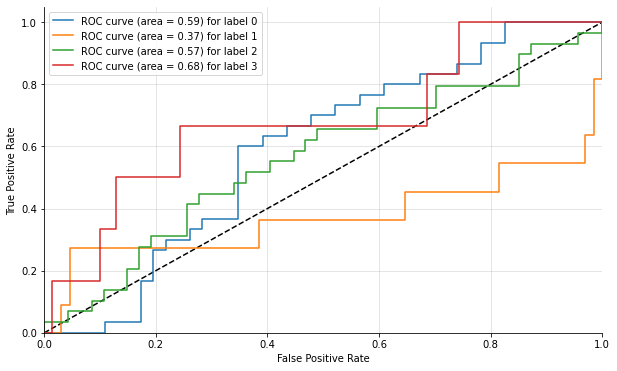

In [34]:
import pandas as pd
import seaborn as sns

y_pred_proba_ = LR.predict_proba(X_test)

# structures
fpr_ = dict()
tpr_ = dict()
roc_auc_ = dict()

y_test_dummies_ = pd.get_dummies(y_test, drop_first=False).values   #to make it binary because roc work with binary not mutli

for i in range(4):
    fpr_[i], tpr_[i], _ = metrics.roc_curve(y_test_dummies_[:, i], y_pred_proba_[:, i])
    roc_auc_[i] = metrics.auc(fpr_[i], tpr_[i])

# roc for each class
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
for i in range(4):
    ax.plot(fpr_[i], tpr_[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc_[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()



We could see that the classifier is more better this time may be because the data increased. We know the classifier is more better because the curve move more twored the top-left corner and the auc incresed. This time the heigher class for auc is 3/'8'